# Linear regression

In [182]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [210]:
import pandas as pd
boston_data=pd.read_csv("HousingData.csv")

In [211]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

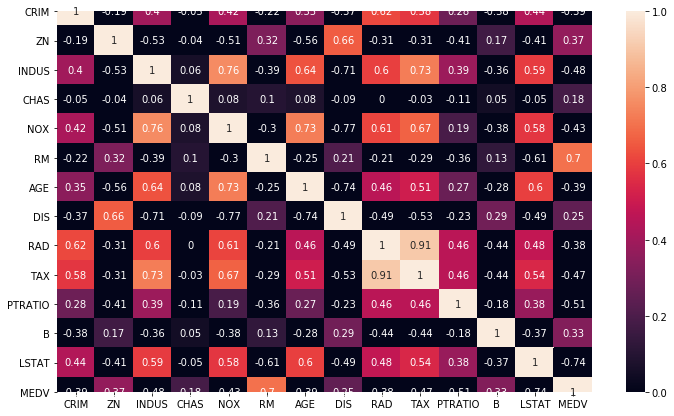

In [213]:
fig, ax=plt.subplots(figsize=(12,7))

correlation_matrix=boston_data.corr().round(2)
sns.heatmap(data=correlation_matrix,vmin=0,vmax=1,annot=True,ax=ax)

In [214]:
boston_data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [215]:
data=boston_data.fillna(0)

In [216]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [217]:
X=data.iloc[:,0:13].values#independant variable
y=data.iloc[:,13].values#dependant variables
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2)

In [219]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg=reg.fit(X_train,y_train)

In [220]:
y_pred=reg.predict(X_test)

In [221]:
from sklearn import metrics
print("RMSE:", metrics.mean_squared_error(y_test,y_pred))
print("R2 Score:",metrics.r2_score(y_test,y_pred))

RMSE: 23.41502382661142
R2 Score: 0.7367034544015885


# Regularisation using Ridge

In [224]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
alpha=0.5
ridge=Ridge(alpha=alpha)
validation_size=0.20
seed=7
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=7)
ridge=ridge.fit(X_train,Y_train)
y_pred_ridge=ridge.predict(X_test)
r2_score_ridge=r2_score(Y_test,y_pred_ridge)
print(ridge)
print(r2_score_ridge)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
0.5314302009240208


# Regularisation using Lasso

In [226]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
alpha=1
lasso=Lasso(alpha=alpha)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=7)
lasso.fit(X_train,Y_train)
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
print("MSE Train: %.3f,test: %.3f "%(mean_squared_error(Y_train,y_train_pred),mean_squared_error(Y_test,y_test_pred)))
print("r2 Train: %.3f,test: %.3f "% (r2_score(Y_train,y_train_pred),r2_score(Y_test,y_test_pred)))
r2_score_lasso=r2_score(Y_test,y_test_pred)
print(lasso)
print("r2 on test data: %f"% r2_score_lasso)

MSE Train: 24.820,test: 34.509 
r2 Train: 0.709,test: 0.573 
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
r2 on test data: 0.572945


# Logistic Regression

In [196]:
data=pd.read_csv("diabetes.csv")

In [197]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [198]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

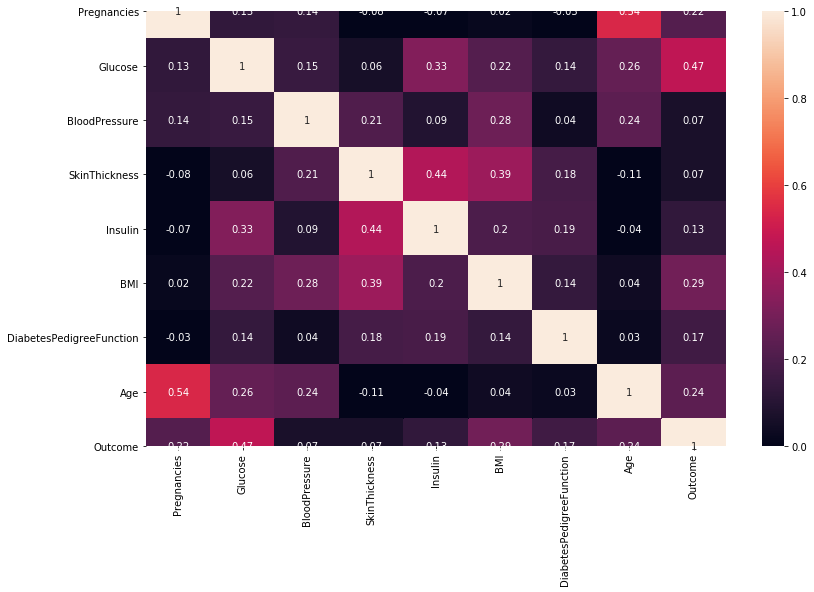

In [199]:
fig, ax=plt.subplots(figsize=(13,8))

correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix,vmin=0,vmax=1,annot=True,ax=ax)

In [200]:
X = data.iloc[:,0:8].values   # independant variables/estimators/predictors
y = data.iloc[:,8].values     # dependant variable

In [201]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [203]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier=classifier.fit(X_train,y_train)

C:\Users\pratik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [204]:
y_pred=classifier.predict(X_test)

In [205]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

[[142  26]
 [ 33  53]]


In [206]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7677165354330708
